### IMPORTS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 1. Reading companies data from input csv

In [2]:
df_comp = pd.read_csv('./input_data/companyInput.csv')  

df_comp.head(3)

,Founded_Year,Organization Name,Funding Status,Last_Funding_Year,Last Funding Type
0,2014,Heliocor,Seed,2018.0,Pre-Seed
1,2017,Oriente,Early Stage Venture,2018.0,Series A
2,2015,Lemonade,Late Stage Venture,2017.0,Series C


### 2. Funnel view of Sector

<p><b>Funnel View -</b> Horizontal plot that describes count of companies as follows:</p><br>
1.Founded<br>
2.Funded<br>
3.Seed Stage<br>
4.Early Stage<br>
5.Late Stage<br>
6.Private Equity<br>
7.IPO<br>
8.Merger &amp; Acquisition

#### a. Create dictionary to hold count values

In [3]:
stage_count = {}

#### b. Adding  count of Founded and Funded companies to dictionary

In [4]:
# Adding founded count to stage_count
founded_count = df_comp['Founded_Year'].count()

stage_count.update({'Founded':founded_count})


# Adding funded count to stage_count
funded_count = df_comp['Last_Funding_Year'].count()

stage_count.update({'Funded':funded_count})

#### c. Adding counts of Seed, Early Stage, Late Stage, M&A, Private Equity and IPO

In [5]:
# Creating list of Funding Status types

stage_lst = list(df_comp['Funding Status'].unique())

print(stage_lst)

['Seed', 'Early Stage Venture', 'Late Stage Venture', nan, 'M&A', 'Private Equity', 'IPO']


In [6]:
# Adding count of number of companies in each Funding Stage to stage_count

for stage in stage_lst :
    count =df_comp['Funding Status'][df_comp['Funding Status']==stage].count()
    if(count>0):
        stage_count.update({stage:count})

print(stage_count)

{'Founded': 674, 'Funded': 405, 'Seed': 225, 'Early Stage Venture': 74, 'Late Stage Venture': 14, 'M&A': 12, 'Private Equity': 1, 'IPO': 1}


#### d. Converting count dictionary to dataframe

In [7]:
# Converting stage_count to count_df dataframe
count_df = pd.Series(stage_count).to_frame('Count')

# Resetting Index 
count_df.index.name = 'Stage'

count_df.reset_index(drop=False, inplace=True)

In [8]:
count_df.head(3)

,Stage,Count
0,Founded,674
1,Funded,405
2,Seed,225


### 3. Plotting  Funnel view 

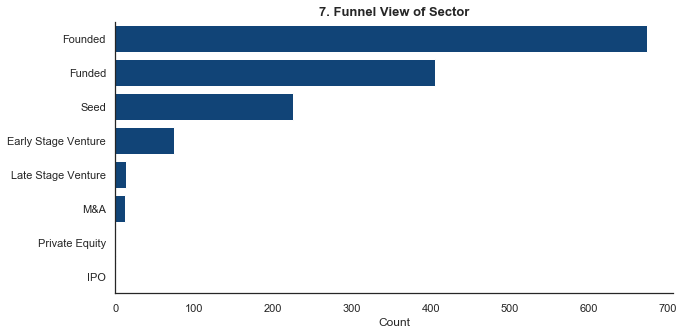

In [9]:
#Plotting Trends

plotTitle = '7. Funnel View of Sector'

sns.set(style="white", rc={"lines.linewidth": 3})

fig, ax = plt.subplots(figsize=(10, 5))

ax.set_title(plotTitle,fontdict={'fontsize':13,'fontweight':'bold'})

sns.barplot(x='Count',
            y='Stage',
            data=count_df,
            color='#004488',
            ax=ax,
            )

ax.set_ylabel('')

sns.despine()

sns.set()


# Saving plot to output .png file

plt.savefig('./output/plots/7_Funnel_View.png', dpi=100)

### 4. Saving results to file

In [10]:
# Writing data to output excel file

from openpyxl import load_workbook

book = load_workbook('./output/outputData.xlsx')

writer = pd.ExcelWriter('./output/outputData.xlsx', engine='openpyxl')

writer.book = book

writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

count_df.to_excel(writer, '7.Funnel_View', index=False)

writer.save()

### 5. Deleting dataframes, series to deallocate memory

In [11]:
del df_comp
del count_df